# K-Fold Mutual Information Estimation

The `torch_mist` package provides basic utilities for estimating value of mutual information using k-fold cross validation.
The considered dataset is split into `K` folds, then `K-2` folds are used to train the mutual information estimation, one fold is used to determine when to stop the training and the last is used to evaluate the value of mutual information. 

This procedure is repeated `K` times (with different train/validation/test splits) to increase the reliability of the estimates.

In [5]:
from torch_mist import k_fold_mi_estimate
from sklearn.datasets import load_iris

# Load the Iris Dataset as a pandas DataFrame
iris_dataset = load_iris(as_frame=True)['data']

# Create np.arrays corresponding to petal and sepal size
petal = iris_dataset[['petal length (cm)', 'petal width (cm)']].values
sepal = iris_dataset[['sepal length (cm)', 'sepal width (cm)']].values

# Estimate how much information the petal size and the target specie have in common
estimated_mi, log = k_fold_mi_estimate(
    # Data parameters
    data=(petal, sepal),          
    folds=5,                    # Number of folds for cross-validation
    seed=42,                    # Seed used to randomize the splits
    # Estimation parameters
    estimator_name='smile',     # Use the Smile mutual information estimator
    hidden_dims=[128],          # Hidden dimensions
    neg_samples=8,              # Number of negative samples
    max_iterations=5000,        # Maximum number of train iterations per fold (max_epoch can be used insted)
    patience=200,
    
    verbose=True,
    verbose_train=False
)

The dataset has 150 entries.
Creating the 5 train/validation/test splits


Fold:   0%|          | 0/5 [00:00<?, ?it/s]

 The `k_fold_mi_estimate` utility function returns the average test mutual information together with a train log, which reports the values of mutual information on train, validation, test and all the available data for each fold. The return value `estimated_mi` refers to the average mutual information on the test folds.

In [9]:
print(f'I(petal;sepal) : {estimated_mi} nats')

I(petal;sepal) : 0.8029249548912049 nats


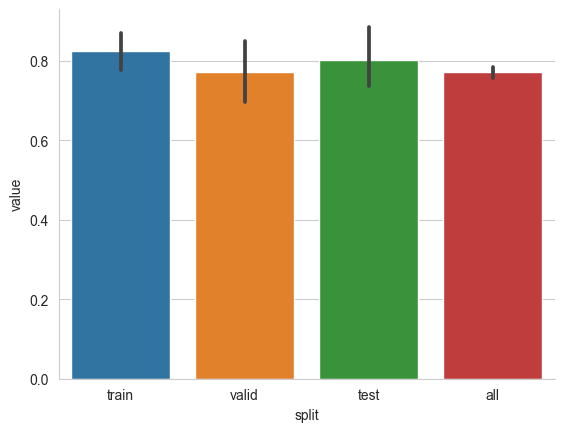

In [10]:
import seaborn as sns
sns.set_style('whitegrid')

sns.barplot(log, x='split', y='value')
sns.despine()